In [9]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

import astropy as apy
from astropy.table import Table

from astroML.plotting import setup_text_plots
from astroML.stats import binned_statistic_2d

setup_text_plots(fontsize=8, usetex=True)

In [10]:
mpl.rcParams['figure.figsize'] = (20,8)
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["font.size"] = 24
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

num_bins = 1000
x_min, x_max = 0, 1.5
y_min, y_max = 15, 23
minx, maxx = 0, 1.5
miny, maxy = 15, 23
#levels = np.array([ 0.97715262,  1.46572894,  1.95430525,  2.44288156,  2.93145787])
levels = [1, 2, 3]

In [11]:
def filter_stars(table):
    star_type_mask = table['MEAN_OBJECT_TYPE'] > 5
    return table[star_type_mask]
    
def filter_galaxies(table):
    star_type_mask = table['MEAN_OBJECT_TYPE'] == 3
    return table[star_type_mask]

def read_stars_hlc_file(filename = "HLC.RA_02_to_03.fits", objfilter="stars"):
    f = apy.io.fits.open(filename)
    table = Table(f[1].data)
    
    if objfilter == "stars":
        table = filter_stars(table)
    elif objfilter == "galaxies":
        table = filter_galaxies(table)
    else:
        raise ValueError("Unknown option for objfilter: {0}".format(objfilter))
    
    #get interesting values
    mags = Table(table['MEAN_PSFMAG_CLIP'], names=('u', 'g', 'r', 'i','z'))   
    rapm = np.abs(table['RA_PM_CLIP'].data)
    decpm = np.abs(table['DEC_PM_CLIP'].data)
    
    return mags, rapm, decpm    

In [12]:
def hess_gri_pm(mags, ra, dec, title=""):
    
    gmi = mags["g"] - mags["i"]
    r = mags["r"]
       
    fig = plt.figure(figsize=(15, 6))
    fig.subplots_adjust(wspace=0.22, left=0.1, right=0.95, bottom=0.12, top=0.90)
    suptitle = title.replace("_", " ")
    fig.suptitle(suptitle)
    
    N,       xedge,    yedge    = binned_statistic_2d(gmi, r, gmi, 'count', bins=num_bins)
    ramed,   raxedge,  rayedge  = binned_statistic_2d(gmi, r, ra,  'median', bins=num_bins)
    decmed,  decxedge, decyedge = binned_statistic_2d(gmi, r, dec, 'median', bins=num_bins) 
    
    #############################################################################################################
    # First
    #############################################################################################################
    ax = plt.subplot(131) 

    plt.imshow(np.log10(N.T), origin='lower', aspect="auto", 
               extent=[xedge[0], xedge[-1], yedge[0], yedge[-1]])
    cb = plt.colorbar(pad=0.12, format=r'$10^{%i}$', orientation='horizontal')
    
    cb.set_label(r"$N_{\mathrm{stars}}$")
    plt.clim(0, 3)
    
    plt.xlabel(r"$g-i$")
    plt.ylabel(r"$r$")
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    
    plt.gca().invert_yaxis()
    
    #############################################################################################################
    # Second
    #############################################################################################################
    ax = plt.subplot(132) 

    plt.imshow(np.log10(ramed.T), origin='lower', aspect="auto",
               extent=[raxedge[0], raxedge[-1], rayedge[0], rayedge[-1]])
    cb = plt.colorbar(pad=0.12 , orientation='horizontal')
    plt.contour(np.log10(N.T), origin='lower', colors="k", levels=levels,
                extent=[xedge[0], xedge[-1], yedge[0], yedge[-1]])
    
    cb.set_label(r"$\mathrm{median}(\mu_{\alpha})$")
    plt.clim(0, 3)
    
    plt.xlabel(r"$g-i$")
    plt.ylabel(r"$r$")
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    
    plt.gca().invert_yaxis()
    
    
    #############################################################################################################
    # Third
    #############################################################################################################
    ax = plt.subplot(133) 

    plt.imshow(np.log10(decmed.T), origin='lower', aspect="auto",
               extent=[decxedge[0], decxedge[-1], decyedge[0], decyedge[-1]])
    cb = plt.colorbar(pad=0.12 , orientation='horizontal')
    plt.contour(np.log10(N.T), origin='lower', levels=levels, colors="k",
                extent=[xedge[0], xedge[-1], decyedge[0], decyedge[-1]])
    
    
    cb.set_label(r"$\mathrm{median}(\mu_{\delta})$")
    plt.clim(0, 3)
    
    plt.xlabel(r"$g-i$")
    plt.ylabel(r"$r$")
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    
    plt.gca().invert_yaxis()
    plt.show()

    

/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log10
/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log10


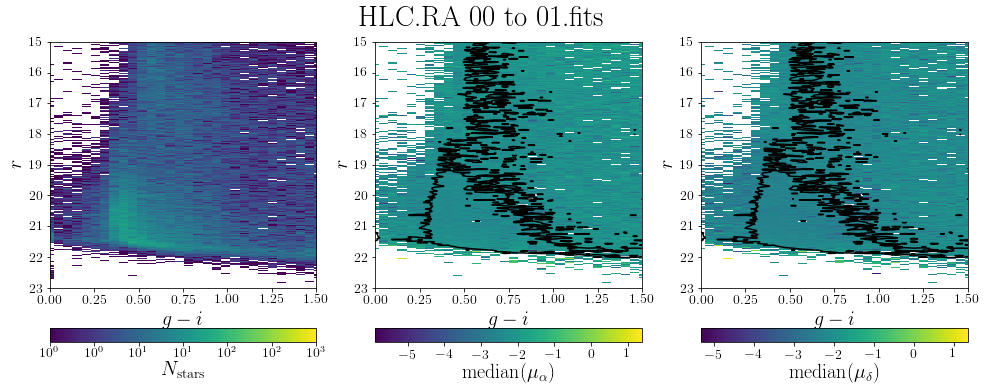

In [14]:
mags, rapm, decpm = read_stars_hlc_file("HLC.RA_00_to_01.fits")
hess_gri_pm(mags, rapm, decpm, title="HLC.RA_00_to_01.fits")

/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10
/home/dino/.conda/envs/DSFP2/lib/python2.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log10


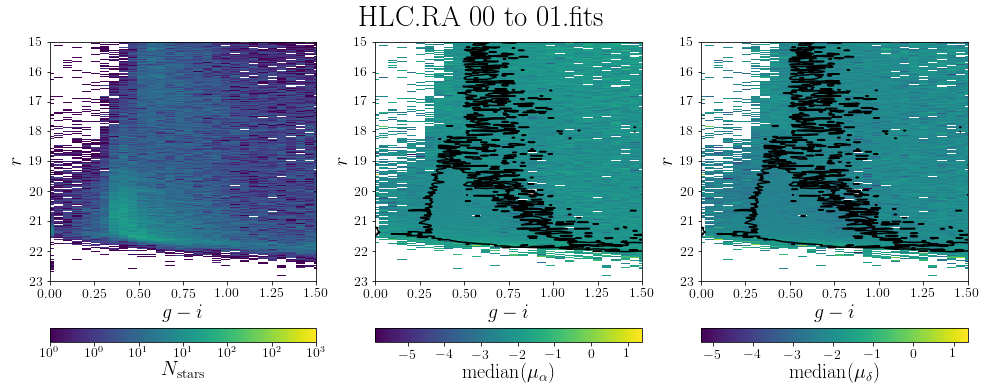

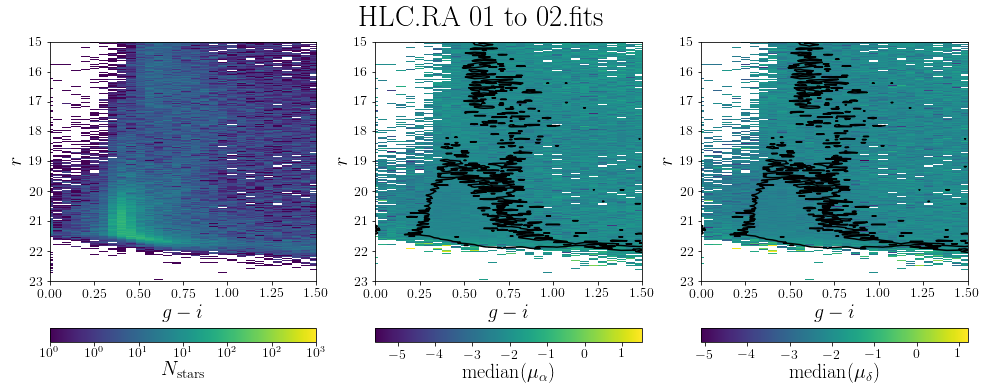

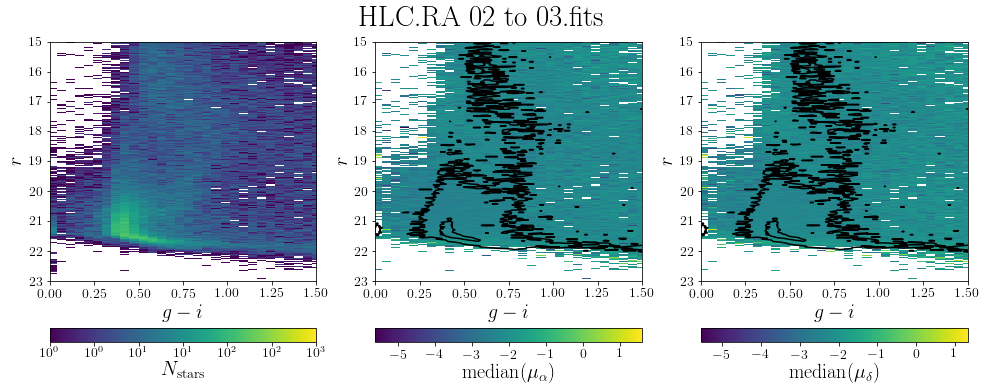

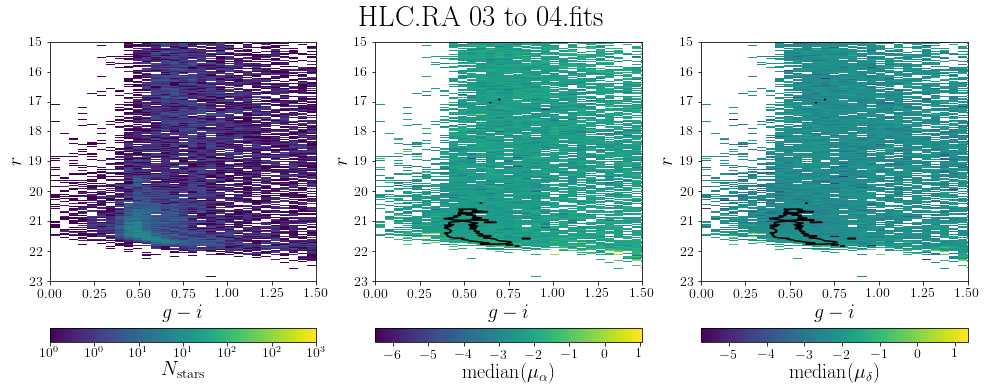

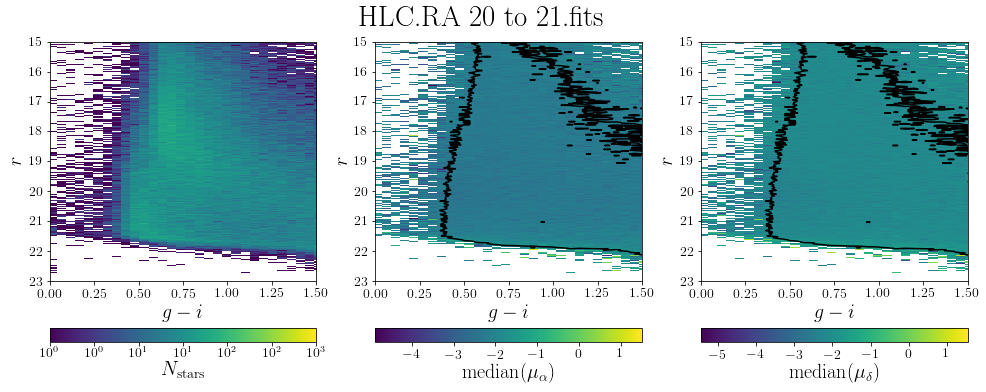

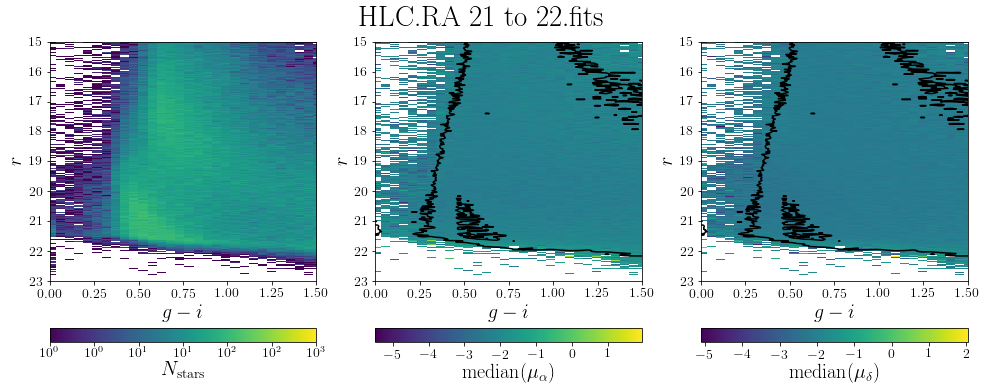

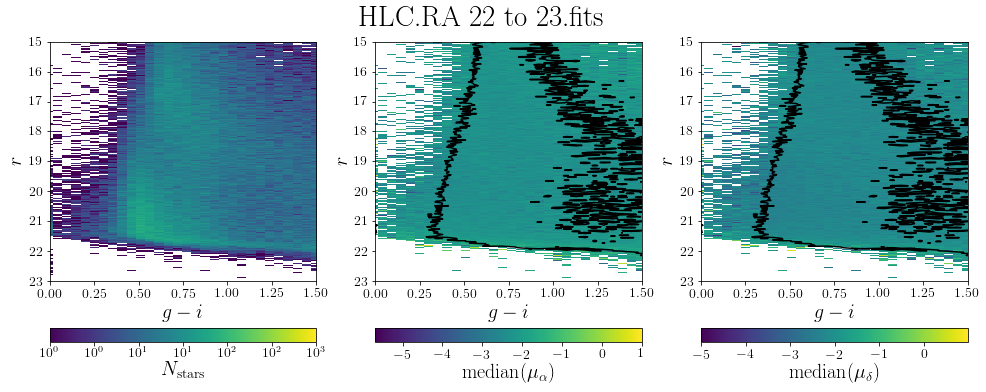

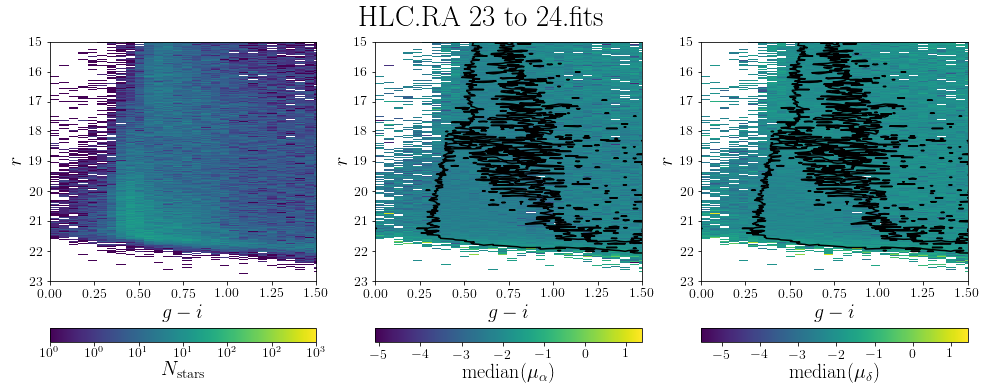

In [143]:
filelist = ["HLC.RA_00_to_01.fits", "HLC.RA_01_to_02.fits", "HLC.RA_02_to_03.fits", 
            "HLC.RA_03_to_04.fits", "HLC.RA_20_to_21.fits", "HLC.RA_21_to_22.fits", 
            "HLC.RA_22_to_23.fits", "HLC.RA_23_to_24.fits"]

for filename in filelist:
    mags, rapm, decpm = read_stars_hlc_file(filename)
    hess_gri_pm(mags, rapm, decpm, title=filename)
    plt.show()

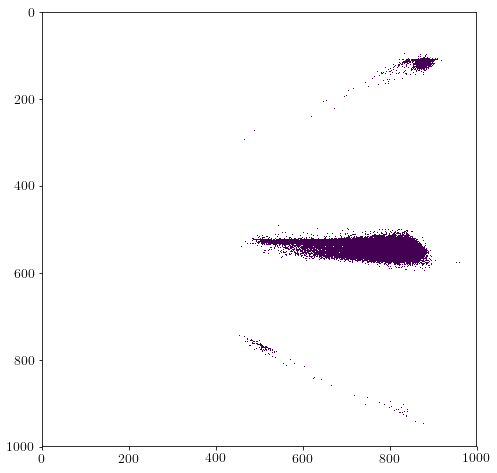

In [144]:
ramed, raxedge, rayedge = binned_statistic_2d(gmi, r, ra,  'median', bins=num_bins)
plt.imshow(ramed)
plt.show()